In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')

In [2]:
class Perceptron:
    #Constructor definition
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 #getting small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f'Initial weights is {self.weights}')
        self.eta = eta
        self.epochs = epochs
    
    #_Z_outcome, the net weighted sum, a private method in the class, that starts with an underscore
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    #Activation/Decision Function, that takes 'z' outcome
    def activation_function(self, z):
        return np.where(z>0, 1, 0)
    
    #The fit method to fit and perform the training
    def fit(self, X, y):
        self.X = X
        self.y = y
        #X with bias
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        
        for epoch in range(self.epochs):
            print('---' * 20)
            print(f'epoch: {epoch + 1} / {self.epochs}')
            print('---' * 20)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            
            print(f'Predicted value after forward pass is: {y_hat}')
            
            #calculating error
            self.error = self.y - y_hat
            print(f'error at epoch {epoch + 1} is {self.error}')
            
            #Updating weights
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f'Updated weights after {epoch}/{self.epochs} is {self.weights}')
            print(f'##' * 20)
    
    #The predict method, to predict an unseen data
    def predict(self, test_input):
        X_with_bias = np.c_[test_input, -np.ones((len(test_input),1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    #We will love to compute the total loss
    def total_loss(self):
        loss = np.sum(self.error)
        print(f'The total loss {loss}')
        #Optional, you can return the loss, if need be
        return loss
    
    #Create the model path and return the path to the model, a private method
    def _create_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        dir_name = os.path.join(model_dir, filename)
        return dir_name
    
    #Save model
    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_return_path('model', filename)
            joblib.dump(self, model_file_path)
    
    #Load model
    def load(self, filepath):
        return joblib.load(filepath)
    

#### Testing Our Model On The And Gate

In [3]:
AND = {
    'X1' : [0,0,1,1],
    'X2' : [0,1,0,1],
    'y'  : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

In [4]:
df_AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


A generic or custom function to prepare data

In [5]:
def prepare_data(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y

In [6]:
X, y = prepare_data(df_AND, 'y')

In [7]:
model_AND = Perceptron(eta=0.02, epochs=20)

Initial weights is [ 1.39139347e-04 -3.16799975e-05  1.52992808e-04]


In [8]:
model_AND.fit(X, y)

------------------------------------------------------------
epoch: 1 / 20
------------------------------------------------------------
Predicted value after forward pass is: [0 0 0 0]
error at epoch 1 is 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after 0/20 is [ 0.02013914  0.01996832 -0.01984701]
########################################
------------------------------------------------------------
epoch: 2 / 20
------------------------------------------------------------
Predicted value after forward pass is: [1 1 1 1]
error at epoch 2 is 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after 1/20 is [ 1.39139347e-04 -3.16799975e-05  4.01529928e-02]
########################################
------------------------------------------------------------
epoch: 3 / 20
------------------------------------------------------------
Predicted value after forward pass is: [0 0 0 0]
error at epoch 3 is 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updat

In [9]:
model_AND.total_loss()

The total loss 0


0

In [10]:
model_AND.save(filename='and_gate.model', model_dir='AND_MODEL')

In [11]:
reload_and_model = Perceptron().load(filepath='AND_MODEL/and_gate.model')

In [21]:
reload_and_model.predict(test_input=[[0,1]])

array([0])

In [13]:
OR_GATE = {
    'X1': [0,0,1,1],
    'X2': [0,1,0,1],
    'y' : [0,1,1,1]
}

df_OR = pd.DataFrame(OR_GATE)

X, y = prepare_data(df_OR, target='y')

In [14]:
model_OR = Perceptron(eta=0.05, epochs=20)

Initial weights is [4.23580077e-05 8.22646224e-05 5.65978617e-05]


In [15]:
model_OR.fit(X, y)

------------------------------------------------------------
epoch: 1 / 20
------------------------------------------------------------
Predicted value after forward pass is: [0 1 0 1]
error at epoch 1 is 0    0
1    0
2    1
3    0
Name: y, dtype: int64
Updated weights after 0/20 is [ 5.00423580e-02  8.22646224e-05 -4.99434021e-02]
########################################
------------------------------------------------------------
epoch: 2 / 20
------------------------------------------------------------
Predicted value after forward pass is: [1 1 1 1]
error at epoch 2 is 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after 1/20 is [5.00423580e-02 8.22646224e-05 5.65978617e-05]
########################################
------------------------------------------------------------
epoch: 3 / 20
------------------------------------------------------------
Predicted value after forward pass is: [0 1 1 1]
error at epoch 3 is 0    0
1    0
2    0
3    0
Name: y, dtype: in

In [16]:
model_OR.total_loss()

The total loss 0


0

XOR GATE

In [17]:
XOR_GATE = {
    'X1' : [0,0,1,1],
    'X2' : [0,1,0,1],
    'y' : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR_GATE)

X, y = prepare_data(df_XOR, target='y')

In [18]:
model_XOR = Perceptron(eta=0.01, epochs=20)
model_XOR.fit(X, y)

Initial weights is [-8.83276670e-05  2.54277239e-04 -2.09634443e-04]
------------------------------------------------------------
epoch: 1 / 20
------------------------------------------------------------
Predicted value after forward pass is: [1 1 1 1]
error at epoch 1 is 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after 0/20 is [-0.01008833 -0.00974572  0.01979037]
########################################
------------------------------------------------------------
epoch: 2 / 20
------------------------------------------------------------
Predicted value after forward pass is: [0 0 0 0]
error at epoch 2 is 0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after 1/20 is [-8.83276670e-05  2.54277239e-04 -2.09634443e-04]
########################################
------------------------------------------------------------
epoch: 3 / 20
------------------------------------------------------------
Predicted value after forward pass is: [1 1 1 1]
error 

In [19]:
model_XOR.total_loss()

The total loss 2


2

---
### Does Perceptron Solve All Problems????

> Perceptron has worked for both AND and OR Gates, but it didn't work for the XOR gate, why???
> Perceptron works on linearly separable data, we can visualize our data on a 2D graph, to have some intuition
---

In [22]:
df_AND, df_OR, df_XOR

(   X1  X2  y
 0   0   0  0
 1   0   1  0
 2   1   0  0
 3   1   1  1,
    X1  X2  y
 0   0   0  0
 1   0   1  1
 2   1   0  1
 3   1   1  1,
    X1  X2  y
 0   0   0  0
 1   0   1  1
 2   1   0  1
 3   1   1  0)

In [29]:
X_and = df_AND[['X1', 'X2']].values
y_and = df_AND.y.values

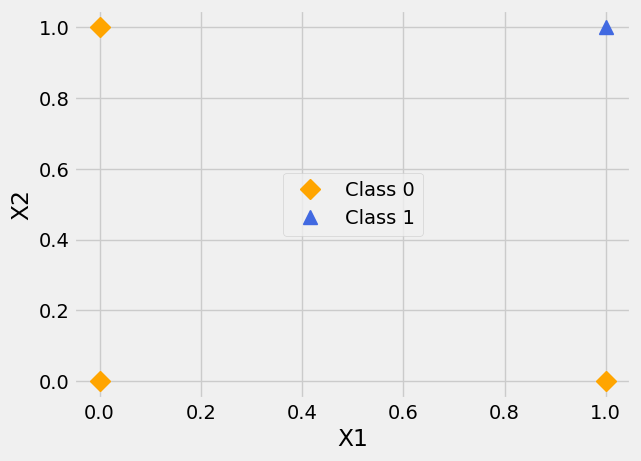

In [37]:
plt.plot(
    X_and[y_and == 0, 0],
    X_and[y_and == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle='',
    color = 'orange',
    label = 'Class 0'
)

plt.plot(
    X_and[y_and == 1, 0],
    X_and[y_and == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    color = 'royalblue',
    label = 'Class 1'
)

plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(loc = 'center')
plt.show()

In [28]:
X_and[y_and == 0]

,X1,X2
0,0,0
1,0,1
2,1,0


OR_GATE Visualization

In [38]:
X_or = df_OR[['X1', 'X2']].values
y_or = df_OR.y.values

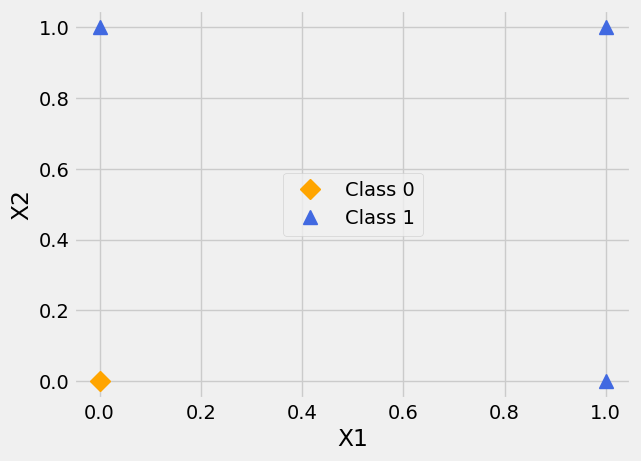

In [39]:
plt.plot(
    X_or[y_or == 0, 0],
    X_or[y_or == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle='',
    color = 'orange',
    label = 'Class 0'
)

plt.plot(
    X_or[y_or == 1, 0],
    X_or[y_or == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    color = 'royalblue',
    label = 'Class 1'
)

plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(loc = 'center')
plt.show()

XOR_GATE Visualization

In [41]:
X_xor = df_XOR[['X1', 'X2']].values
y_xor = df_XOR.y.values

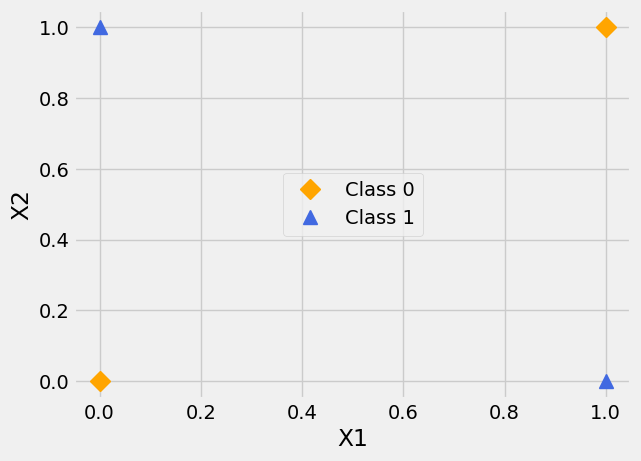

In [42]:
plt.plot(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle='',
    color = 'orange',
    label = 'Class 0'
)

plt.plot(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    color = 'royalblue',
    label = 'Class 1'
)

plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(loc = 'center')
plt.show()

From the visualization, we can see that the XOR Gate is not linearly separable

In [ ]:
def save_plot(df, model, filename='plot.png', plot_dir='plots'):
    def _create_base_plot(df):
        df.plot(kind='scatter', x='X1', y='X2', c='y', s=100, cmap='coolwarm')
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    def _plot_decision_regions(X, y, classifier):
        colors = ('cyan', 'lightgreen')
        cmap = ListedColormap(colors)
        
        X = X.values
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)